# 프로젝트 개요

[ 파일명 수정 ]
- 2조(20609_김형진, 20615_장인수, 20620_최재혁)_유가변동에 의한 교통량 분석.ipynb

[ 팀원 ]
- 팀원 1 학번 : 20609
- 팀원 1 이름 : 김형진
- 팀원 2 학번 : 20615
- 팀원 2 이름 : 장인수
- 팀원 3 학번 : 20620
- 팀원 3 이름 : 최재혁
 
[ 주제 ]
- 프로젝트 주제 : 유류 가격이라는 외부 요인에 의한 교통량 분석

[ 유의사항 ]
- 각 단계마다 Markdown과 Code를 최대한 구체적으로 작성할 것
- 아래의 양식은 가이드라인일 뿐, 머신러닝 과정의 6단계와 필수 조건이 모두 존재한다면 양식 및 순서 등을 자유롭게 수정하여 작성 가능함

# 1. 문제 정의 

[ 내용 ]
- 프로젝트 주제를 구체적으로 설명 (주제 / 선정 이유 / 계획 등)

[ 문제 정의 ]
- 주제 (# 필수 조건) : 유가변동에 의한 교통량 분석
- 선정 이유 (# 필수 조건) : 최근 유가 상승에 관한 뉴스로 많은 사람들에게 관심이 집중 된 가운데, 이러한 유가 변동이 교통량에는 어떤 영향을 끼치는 지 분석하고 싶어 프로젝트를 선정하게 되었음
- 계획 : 최근 3년의 유가 변동 데이터와 교통량 데이터를 불러온 뒤, 그래프로 날짜에 따른 유가변동 추이를 확인하여 알고리즘 종류를 선택한다. 선택한 이후, 회귀 혹은 분류 알고리즘을 통해 데이터를 예측할 수 있도록 한다

In [318]:
# 문제 정의

# 2. 데이터 수집

[ 내용 ]
- 프로젝트 진행을 위해 필요한 데이터 수집
- 사이킷런에 내장되어 있는 학습용 데이터 사용 금지
- 수집한 데이터의 소스(사이트 및 링크) 반드시 기재 

[ 데이터 수집 ]
- 데이터 파일명 (# 필수 조건) : 
 - 2조(20609_김형진, 20615_장인수, 20620_최재혁)_diesel.csv
 - 2조(20609_김형진, 20615_장인수, 20620_최재혁)_gasoline.csv
 
 - 2조(20609_김형진, 20615_장인수, 20620_최재혁)_daily_traffic.csv
 - 2조(20609_김형진, 20615_장인수, 20620_최재혁)_precipitation.csv
 
 
- 데이터 소스 (# 필수 조건)
 - 3년의 기름값 데이터 : https://www.opinet.co.kr/user/dopospdrg/dopOsPdrgAreaView.do
 - 권역 별 이용 차량 : http://data.ex.co.kr/portal/traffic/trafficRegion#
 - 기상 자료 : https://data.kma.go.kr/climate/RankState/selectRankStatisticsDivisionList.do

In [319]:
# 데이터 수집

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [320]:
gasoline_price = pd.read_csv('2조(20609_김형진, 20615_장인수, 20620_최재혁)_gasoline.csv', encoding='cp949')
gasoline_price

,구분,서울
0,2020년06월17일,1430.14
1,2020년06월18일,1431.91
2,2020년06월19일,1433.78
3,2020년06월20일,1435.17
4,2020년06월21일,1436.21
...,...,...
726,2022년06월13일,2140.80
727,2022년06월14일,2149.69
728,2022년06월15일,2155.02
729,2022년06월16일,2159.03


In [321]:
diesel_price = pd.read_csv('2조(20609_김형진, 20615_장인수, 20620_최재혁)_diesel.csv', encoding='cp949')
diesel_price

,구분,서울
0,2020년06월17일,1240.32
1,2020년06월18일,1241.71
2,2020년06월19일,1243.35
3,2020년06월20일,1245.04
4,2020년06월21일,1245.99
...,...,...
726,2022년06월13일,2136.35
727,2022년06월14일,2149.23
728,2022년06월15일,2157.28
729,2022년06월16일,2162.10


In [322]:
daily_traffic = pd.read_csv('2조(20609_김형진, 20615_장인수, 20620_최재혁)_daily_traffic.csv', encoding='cp949')
daily_traffic

,권역,입출구,2020.12.06,2020.12.07,2020.12.08,2020.12.09,2020.12.10,2020.12.11,2020.12.12,2020.12.13,...,2022.06.07,2022.06.08,2022.06.09,2022.06.10,2022.06.11,2022.06.12,2022.06.13,2022.06.14,2022.06.15,2022.06.16
0,수도권본부,출구,"1,078,145","1,423,350","1,405,607","1,418,693","1,431,632","1,495,446","1,276,019","878,245",...,"1,527,320","1,511,366","1,497,771","1,582,400","1,417,363","1,236,052","1,494,344","1,494,851","1,458,354","1,520,533"
1,강원본부,출구,"178,826","197,219","194,636","193,647","197,559","235,676","219,394","143,367",...,"216,326","214,976","214,423","258,824","255,520","209,919","221,271","211,687","206,979","220,686"
2,대전충남본부,출구,"273,571","308,932","298,639","300,256","301,894","334,871","300,967","228,876",...,"337,029","328,145","329,460","370,499","354,027","319,281","343,045","327,413","323,828","342,168"
3,전북본부,출구,"105,799","113,400","107,446","107,921","111,008","131,215","129,721","88,203",...,"115,309","112,753","116,710","140,792","161,900","122,368","121,501","112,034","112,161","121,599"
4,광주전남본부,출구,"227,531","231,053","225,886","227,321","231,144","269,108","265,556","210,126",...,"238,584","231,010","238,857","275,065","292,892","253,680","240,760","226,741","238,745","251,028"
5,대구경북본부,출구,"323,017","360,733","355,062","357,100","357,091","394,647","371,277","283,656",...,"425,293","418,355","422,592","468,905","458,059","396,703","424,691","393,165","410,879","432,608"
6,부산경남본부,출구,"536,274","643,109","628,480","631,374","640,220","709,891","655,618","521,947",...,"677,877","668,934","679,998","743,564","716,748","624,024","680,155","618,857","673,152","709,816"
7,충북본부,출구,"129,682","154,886","148,861","148,537","150,830","172,385","152,029","103,695",...,"174,318","165,956","167,431","195,984","195,881","162,065","174,276","165,773","165,167","174,040"
8,전국,출구,"2,852,845","3,432,682","3,364,617","3,384,849","3,421,378","3,743,239","3,370,581","2,458,115",...,"3,712,056","3,651,495","3,667,242","4,036,033","3,852,390","3,324,092","3,700,043","3,550,521","3,589,265","3,772,478"


In [323]:
precipitation = pd.read_csv('2조(20609_김형진, 20615_장인수, 20620_최재혁)_precipitation.csv', encoding='cp949')
precipitation

,지점번호,지점명,일시,강수량(mm),1시간최다강수량(mm),1시간최다강수량시각,Unnamed: 6
0,108,서울,2020-01-01,0.1,NaN,NaN,NaN
1,108,서울,2020-01-02,NaN,NaN,NaN,NaN
2,108,서울,2020-01-03,NaN,NaN,NaN,NaN
3,108,서울,2020-01-04,NaN,NaN,NaN,NaN
4,108,서울,2020-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
894,108,서울,2022-06-13,18.0,15.5,4:00,NaN
895,108,서울,2022-06-14,0.0,0.0,NaN,NaN
896,108,서울,2022-06-15,18.5,5.8,1:44,NaN
897,108,서울,2022-06-16,0.7,0.3,0:35,NaN


# 3. 데이터 전처리

[ 내용 ]
- 데이터 분석 및 모델 학습을 위한 구조로 데이터를 가공하거나 변형
- 기본적으로 코드(판다스 및 넘파이 라이브러리 등 활용)를 통해 전처리 작업을 수행해야 하지만, 힘들 경우 데이터 파일 자체를 수정하여 전처리하여도 됨
- (# 필수 조건 : 위의 경우, 수행해야 하는 전처리 작업과 수행하지 못한 이유를 작성해야 함)
- 모든 전처리 작업이 수행된 최종 데이터를 명시해야 함

[ 데이터 전처리 ]
- 필요한 전처리 작업 : 결측치 확인, 데이터를 result로 합치기, 강수량이 있을 때의 교통량을 제거
- 전처리 결과 : result 값을 출력한 것을 보면, 잘 된 것을 볼 수 있다. (result 출력은 전처리 맨 끝에 있음)

In [324]:
# 데이터 전처리

In [325]:
daily_traffic = daily_traffic.transpose()
daily_traffic

,0,1,2,3,4,5,6,7,8
권역,수도권본부,강원본부,대전충남본부,전북본부,광주전남본부,대구경북본부,부산경남본부,충북본부,전국
입출구,출구,출구,출구,출구,출구,출구,출구,출구,출구
2020.12.06,"1,078,145","178,826","273,571","105,799","227,531","323,017","536,274","129,682","2,852,845"
2020.12.07,"1,423,350","197,219","308,932","113,400","231,053","360,733","643,109","154,886","3,432,682"
2020.12.08,"1,405,607","194,636","298,639","107,446","225,886","355,062","628,480","148,861","3,364,617"
...,...,...,...,...,...,...,...,...,...
2022.06.12,"1,236,052","209,919","319,281","122,368","253,680","396,703","624,024","162,065","3,324,092"
2022.06.13,"1,494,344","221,271","343,045","121,501","240,760","424,691","680,155","174,276","3,700,043"
2022.06.14,"1,494,851","211,687","327,413","112,034","226,741","393,165","618,857","165,773","3,550,521"
2022.06.15,"1,458,354","206,979","323,828","112,161","238,745","410,879","673,152","165,167","3,589,265"


In [326]:
print('휘발유 데이터의 결측치\n',gasoline_price.isna().sum(), end='\n\n')
print('경유 데이터의 결측치\n', diesel_price.isna().sum(), end='\n\n')
print('일일 교통량 데이터의 결측치\n', daily_traffic.isna().sum(), end='\n\n')
print('강수량 데이터의 결측치\n', precipitation.isna().sum(), end='\n\n')

휘발유 데이터의 결측치
 구분    0
서울    0
dtype: int64

경유 데이터의 결측치
 구분    0
서울    0
dtype: int64

일일 교통량 데이터의 결측치
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

강수량 데이터의 결측치
 지점번호              0
지점명               0
일시                0
강수량(mm)         531
1시간최다강수량(mm)    669
1시간최다강수량시각      744
Unnamed: 6      750
dtype: int64



In [327]:
precipitation = precipitation.fillna(0)
print('강수량 데이터의 결측치\n', precipitation.isna().sum(), end='\n\n')

강수량 데이터의 결측치
 지점번호            0
지점명             0
일시              0
강수량(mm)         0
1시간최다강수량(mm)    0
1시간최다강수량시각      0
Unnamed: 6      0
dtype: int64



In [328]:
daily_traffic = daily_traffic.drop(labels=['권역', '입출구'], axis=0)
daily_traffic = daily_traffic.drop(columns=list(range(0,8)), axis=1)
daily_traffic = daily_traffic.rename(columns={8:'전국'})
daily_traffic

,전국
2020.12.06,"2,852,845"
2020.12.07,"3,432,682"
2020.12.08,"3,364,617"
2020.12.09,"3,384,849"
2020.12.10,"3,421,378"
...,...
2022.06.12,"3,324,092"
2022.06.13,"3,700,043"
2022.06.14,"3,550,521"
2022.06.15,"3,589,265"


In [329]:
daily_traffic = daily_traffic.reset_index()
daily_traffic = daily_traffic.rename(columns={'index':'날짜'})
daily_traffic

,날짜,전국
0,2020.12.06,"2,852,845"
1,2020.12.07,"3,432,682"
2,2020.12.08,"3,364,617"
3,2020.12.09,"3,384,849"
4,2020.12.10,"3,421,378"
...,...,...
553,2022.06.12,"3,324,092"
554,2022.06.13,"3,700,043"
555,2022.06.14,"3,550,521"
556,2022.06.15,"3,589,265"


In [330]:
for i in range(len(daily_traffic)):
  daily_traffic['날짜'][i] = daily_traffic['날짜'][i].replace('.', '')
  daily_traffic['전국'][i] = daily_traffic['전국'][i].replace(',', '')
daily_traffic

,날짜,전국
0,20201206,2852845
1,20201207,3432682
2,20201208,3364617
3,20201209,3384849
4,20201210,3421378
...,...,...
553,20220612,3324092
554,20220613,3700043
555,20220614,3550521
556,20220615,3589265


In [331]:
for i in range(len(gasoline_price)):
  gasoline_price['구분'][i] = gasoline_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')

gasoline_price = gasoline_price.rename(columns={'구분':'날짜', '서울':'휘발유'})
gasoline_price

C:\Users\user\AppData\Local\Temp\ipykernel_10256\2749514706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gasoline_price['구분'][i] = gasoline_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')


,날짜,휘발유
0,20200617,1430.14
1,20200618,1431.91
2,20200619,1433.78
3,20200620,1435.17
4,20200621,1436.21
...,...,...
726,20220613,2140.80
727,20220614,2149.69
728,20220615,2155.02
729,20220616,2159.03


In [332]:
for i in range(len(diesel_price)):
  diesel_price['구분'][i] = diesel_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')

diesel_price = diesel_price.rename(columns={'구분':'날짜', '서울':'경유'})
diesel_price

C:\Users\user\AppData\Local\Temp\ipykernel_10256\2067969374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diesel_price['구분'][i] = diesel_price['구분'][i].replace('년', '').replace('월', '').replace('일', '')


,날짜,경유
0,20200617,1240.32
1,20200618,1241.71
2,20200619,1243.35
3,20200620,1245.04
4,20200621,1245.99
...,...,...
726,20220613,2136.35
727,20220614,2149.23
728,20220615,2157.28
729,20220616,2162.10


In [333]:
precipitation = precipitation.rename(columns={'일시':'날짜'})
precipitation = precipitation.drop(columns=['지점번호', '지점명', '1시간최다강수량(mm)', '1시간최다강수량시각', 'Unnamed: 6'])

for i in range(len(precipitation)):
  precipitation['날짜'][i] = precipitation['날짜'][i].replace('-', '')
  
precipitation

C:\Users\user\AppData\Local\Temp\ipykernel_10256\4233384256.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precipitation['날짜'][i] = precipitation['날짜'][i].replace('-', '')


,날짜,강수량(mm)
0,20200101,0.1
1,20200102,0.0
2,20200103,0.0
3,20200104,0.0
4,20200105,0.0
...,...,...
894,20220613,18.0
895,20220614,0.0
896,20220615,18.5
897,20220616,0.7


In [334]:
diesel_price = diesel_price[diesel_price['날짜'].between('20201206','20220616')]
gasoline_price = gasoline_price[gasoline_price['날짜'].between('20201206','20220616')]
precipitation = precipitation[precipitation['날짜'].between('20201206','20220616')]

In [335]:
daily_traffic = daily_traffic.astype({'전국':'int'})
daily_traffic.dtypes

날짜    object
전국     int32
dtype: object

In [336]:
result = pd.merge(daily_traffic, gasoline_price)
result = pd.merge(result, diesel_price)
result = pd.merge(result, precipitation)
result 

,날짜,전국,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
553,20220612,3324092,2132.46,2126.05,0.0
554,20220613,3700043,2140.80,2136.35,18.0
555,20220614,3550521,2149.69,2149.23,0.0
556,20220615,3589265,2155.02,2157.28,18.5


In [337]:
rain = result['강수량(mm)']

for i in range(len(rain)):
    if(rain[i] != 0):
        result = result.drop(labels=i, axis=0)

result = result.reset_index()
result = result.drop(columns='index', axis=1)

In [338]:
result.describe()

,전국,휘발유,경유,강수량(mm)
count,3.990000e+02,399.000000,399.000000,399.0
mean,3.536003e+06,1741.455238,1578.422857,0.0
std,3.680564e+05,178.356593,231.651761,0.0
min,2.054131e+06,1420.480000,1227.590000,0.0
25%,3.380876e+06,1615.050000,1414.925000,0.0
50%,3.604112e+06,1722.470000,1524.750000,0.0
75%,3.739918e+06,1820.495000,1637.910000,0.0
max,4.368889e+06,2149.690000,2149.230000,0.0


In [339]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       399 non-null    object 
 1   전국       399 non-null    int32  
 2   휘발유      399 non-null    float64
 3   경유       399 non-null    float64
 4   강수량(mm)  399 non-null    float64
dtypes: float64(3), int32(1), object(1)
memory usage: 14.2+ KB


In [340]:
result = result.rename(columns={'전국':'교통량'})
result

,날짜,교통량,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
394,20220607,3712056,2105.60,2086.53,0.0
395,20220608,3651495,2112.39,2096.07,0.0
396,20220611,3852390,2129.47,2121.67,0.0
397,20220612,3324092,2132.46,2126.05,0.0


# 4. 데이터 분석

[ 내용 ]
- 수집한 데이터의 탐색 및 분석을 진행
- 반드시 하나 이상의 그래프(맷플롯립 라이브러리 등 활용)를 활용해야 함 (# 필수 조건)
- 매 데이터 분석의 결과를 명시해야 함 (# 필수 조건)

In [341]:
# 데이터 분석

In [342]:
import datetime
from dateutil.relativedelta import relativedelta

result_day = result['날짜'][0]
check_day = datetime.date(int(result_day[:4]), int(result_day[4:6]), int(result_day[6:]))
graph_gas_price_xlabels = []

for i in range(int((len(result)/ 30))+1):
  graph_gas_price_xlabels.append(check_day + relativedelta(months=1)*i)

for i in range(len(graph_gas_price_xlabels)):
  graph_gas_price_xlabels[i] = str(graph_gas_price_xlabels[i])[:7].replace('-', '')

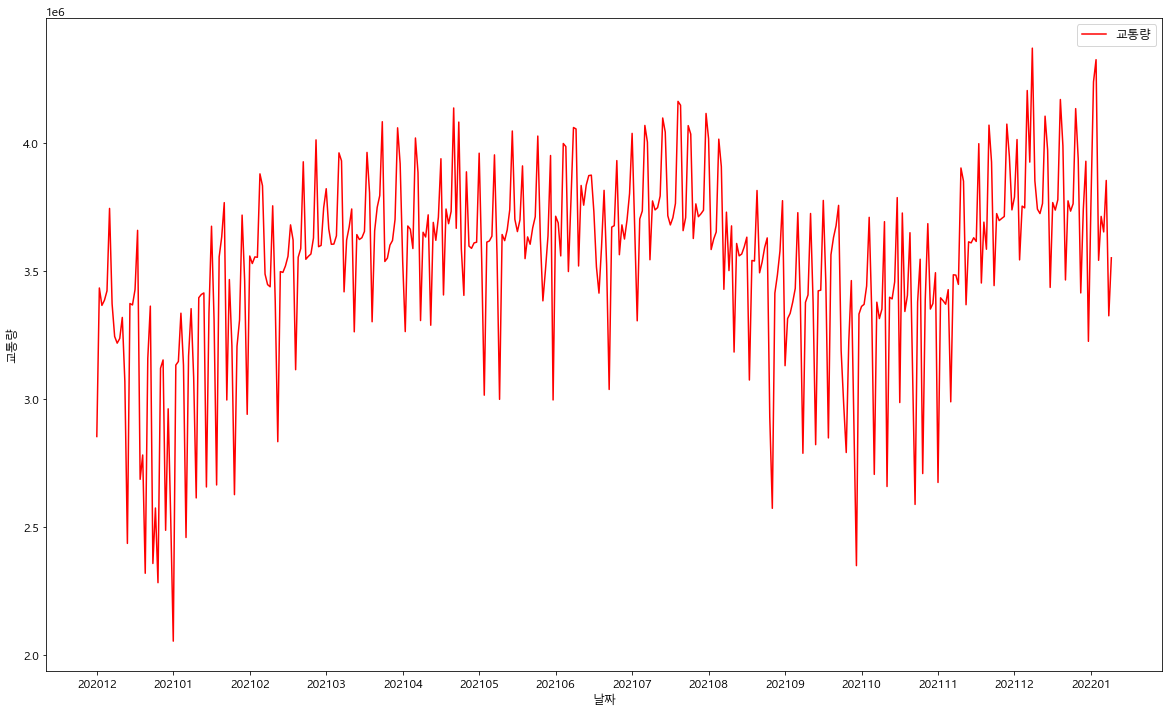

In [343]:
day = result['날짜']
daily_traffic_in = result['교통량']

plt.rc('font', family='Malgun Gothic', size='12')
plt.figure(figsize=(20, 12))

plt.xlabel('날짜')
plt.ylabel('교통량')

plt.xticks(np.arange(0, len(result), 30), labels=graph_gas_price_xlabels)

plt.plot(daily_traffic_in, c='red', label='교통량')

plt.legend()
plt.show()

[ 데이터 분석 ]
- 분석 내용 : 날짜에 대한 교통량 분석
- 분석 결과 : 교통량을 분석했을 때, 날짜마다 변동 추세가 큰 교통량을 나타내는 것을 알 수 있다.

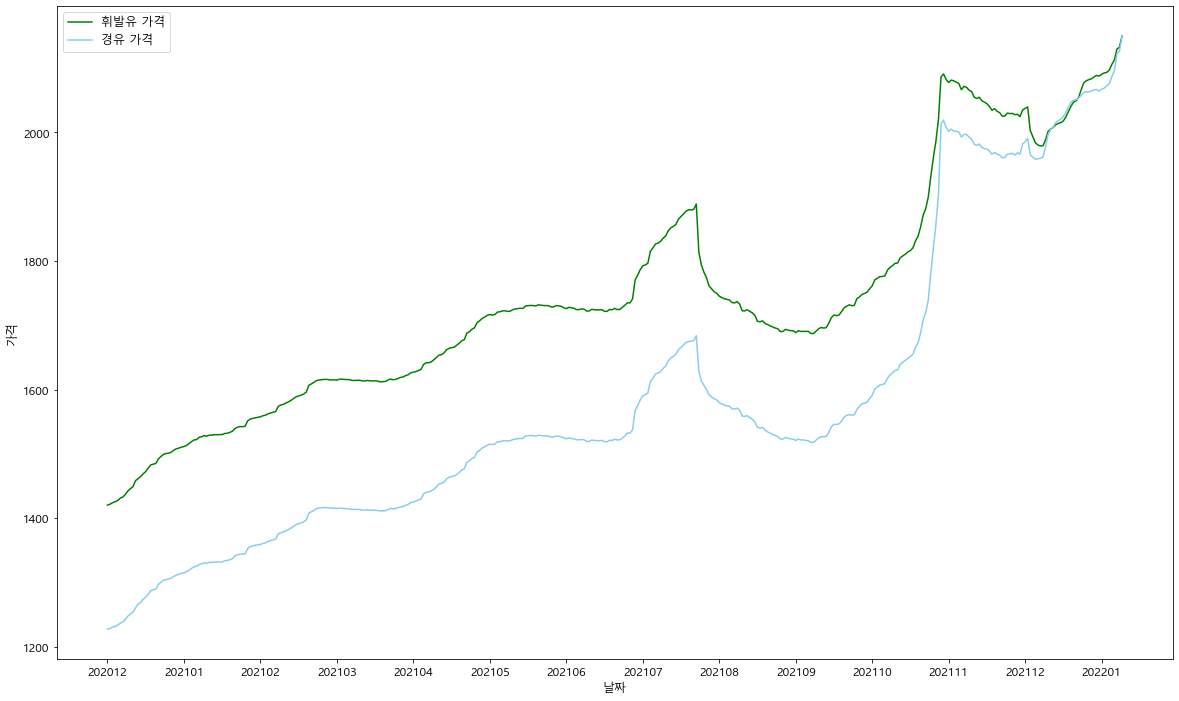

In [344]:
day = result['날짜']
gasoline_price_in = result['휘발유']
diesel_price_in = result['경유']

plt.rc('font', family='Malgun Gothic', size='12')
plt.figure(figsize=(20, 12))

plt.xlabel('날짜')
plt.ylabel('가격')

plt.xticks(np.arange(0, len(result), 30), labels=graph_gas_price_xlabels)

plt.plot(gasoline_price_in, c='green', label='휘발유 가격')
plt.plot(diesel_price_in, c='skyblue', label='경유 가격')

plt.legend()
plt.show()

[ 데이터 분석 ]
- 분석 내용 : 날짜에 대한 유가변동 분석
- 분석 결과 : 유가가 중간에 내린 적도 있지만, 대체적으로 날짜가 지날 수록 올라가는 경향을 볼 수 있다.

[ 데이터 분석 ]
- 분석 내용 : 종합적으로 봤을 때의 분석
- 분석 결과 : 유가가 상승했을 때 바로 교통량이 줄어들지는 않지만, 어느 정도 시간이 지났을 때 교통량에 작용이 있는 것을 알 수 있다. 또한, 교통량의 변동률이 크긴 하지만 전체적인 유가의 추세와 비슷한 모습을 보이는 것을 알 수 있다.

# 5. 모델 학습

[ 내용 ] 
- 머신러닝 알고리즘(회귀 및 분류)을 사용하여 모델의 학습을 진행
- 수업시간에 배운 것 이외의 알고리즘도 사용 가능함
- (# 필수 조건 : 위의 경우, 해당 알고리즘의 원리 및 간단한 설명을 작성해야 함)
- 반드시 '훈련 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 학습 ]
- 사용한 머신러닝 알고리즘 (# 필수 조건) : K-최근접 이웃 회귀 알고리즘, 선형 회귀 알고리즘
- 해당 알고리즘의 원리
  - K 최근접 이웃 회귀 알고리즘 : 지정한 K값 만큼 이웃한 데이터를 참고하여 추세선을 지정하고 분석하는 회귀 알고리즘
  - 다항(선형) 회귀 알고리즘 : 1개의 독립변수가 존재하는 데이터를, 직선 형태의 추세선을 이용하여 분석하는 회귀 알고리즘

In [345]:
# 모델 학습

In [346]:
result

,날짜,교통량,휘발유,경유,강수량(mm)
0,20201206,2852845,1420.48,1227.59,0.0
1,20201207,3432682,1421.92,1228.70,0.0
2,20201208,3364617,1424.18,1230.83,0.0
3,20201209,3384849,1425.68,1231.72,0.0
4,20201210,3421378,1427.67,1233.75,0.0
...,...,...,...,...,...
394,20220607,3712056,2105.60,2086.53,0.0
395,20220608,3651495,2112.39,2096.07,0.0
396,20220611,3852390,2129.47,2121.67,0.0
397,20220612,3324092,2132.46,2126.05,0.0


In [347]:
# 휘발유 데이터 구조 변환
gasoline = result['휘발유']
print(gasoline.shape)

gasoline = gasoline.to_numpy()
gasoline = gasoline.reshape(-1, 1)
print(gasoline.shape)


# 교통량 데이터 구조 변환
traffic = result['교통량']
print(traffic.shape)

traffic = traffic.to_numpy()
traffic = traffic.reshape(-1, 1)
print(traffic.shape)


# 경유 데이터 구조 변환
diesel = result['경유']
print(diesel.shape)

diesel = diesel.to_numpy()
diesel = diesel.reshape(-1, 1)
print(diesel.shape)

(399,)
(399, 1)
(399,)
(399, 1)
(399,)
(399, 1)


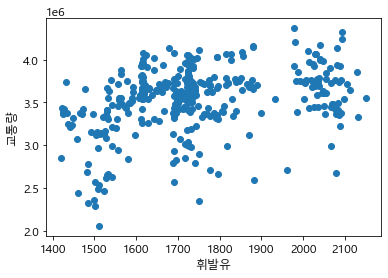

In [348]:
plt.scatter(gasoline, traffic)
plt.rc('font', family='Malgun Gothic')

plt.xlabel('휘발유')
plt.ylabel('교통량')
plt.show()

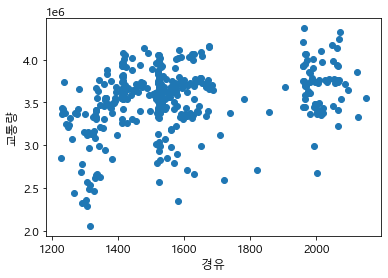

In [349]:
plt.scatter(diesel, traffic)
plt.rc('font', family='Malgun Gothic')

plt.xlabel('경유')
plt.ylabel('교통량')
plt.show()

In [350]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [351]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

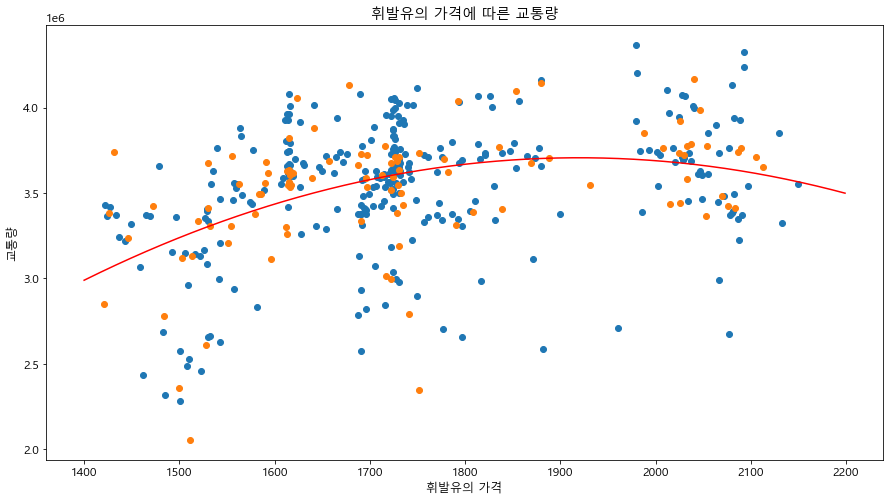

In [352]:
input_l_train, input_l_test, target_l_train, target_l_test = train_test_split(gasoline, traffic, 
                                                                      shuffle=True, random_state=42)
model_lr_g = LinearRegression()
model_lr_g.fit(input_l_train, target_l_train)

poly_d2 = PolynomialFeatures(degree = 2, include_bias = False)

train_poly = poly_d2.fit_transform(input_l_train)
test_poly = poly_d2.fit_transform(input_l_test)

model_lr_g_poly = LinearRegression()
model_lr_g_poly.fit(train_poly, target_l_train)

x = np.arange(np.min(gasoline), np.max(gasoline), 0.1).reshape(-1, 1)   

x = np.arange(1400, 2200).reshape(-1, 1)
x_poly = poly_d2.fit_transform(x)

plt.figure(figsize=(15, 8))
plt.scatter(input_l_train, target_l_train)
plt.scatter(input_l_test, target_l_test)

plt.plot(x, model_lr_g_poly.predict(x_poly), "r")

plt.rc('font', family = 'Malgun Gothic')

plt.title('휘발유의 가격에 따른 교통량')
plt.xlabel('휘발유의 가격')
plt.ylabel('교통량')

plt.show()

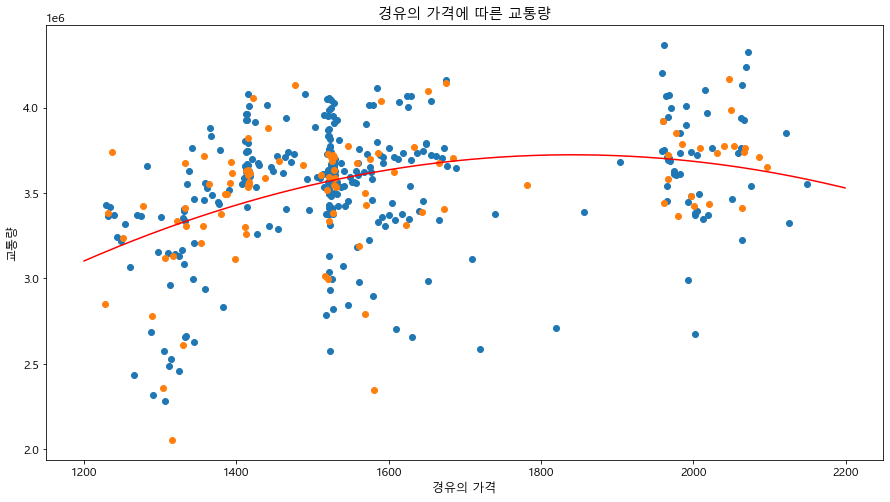

In [353]:
input_ld_train, input_ld_test, target_ld_train, target_ld_test = train_test_split(diesel, traffic, 
                                                                      shuffle=True, random_state=42)
model_lr = LinearRegression()
model_lr.fit(input_ld_train, target_ld_train)

poly_d2 = PolynomialFeatures(degree = 2, include_bias = False)

train_d_poly = poly_d2.fit_transform(input_ld_train)
test_d_poly = poly_d2.fit_transform(input_ld_test)

model_lr_poly = LinearRegression()
model_lr_poly.fit(train_d_poly, target_ld_train)

x = np.arange(np.min(gasoline), np.max(gasoline), 0.1).reshape(-1, 1)   

x = np.arange(1200, 2200).reshape(-1, 1)
x_poly = poly_d2.fit_transform(x)

plt.figure(figsize=(15, 8))
plt.scatter(input_ld_train, target_ld_train)
plt.scatter(input_ld_test, target_ld_test)

plt.plot(x, model_lr_poly.predict(x_poly), "r")

plt.rc('font', family = 'Malgun Gothic')

plt.title('경유의 가격에 따른 교통량')
plt.xlabel('경유의 가격')
plt.ylabel('교통량')

plt.show()

(299, 1) (299, 1) (100, 1) (100, 1)


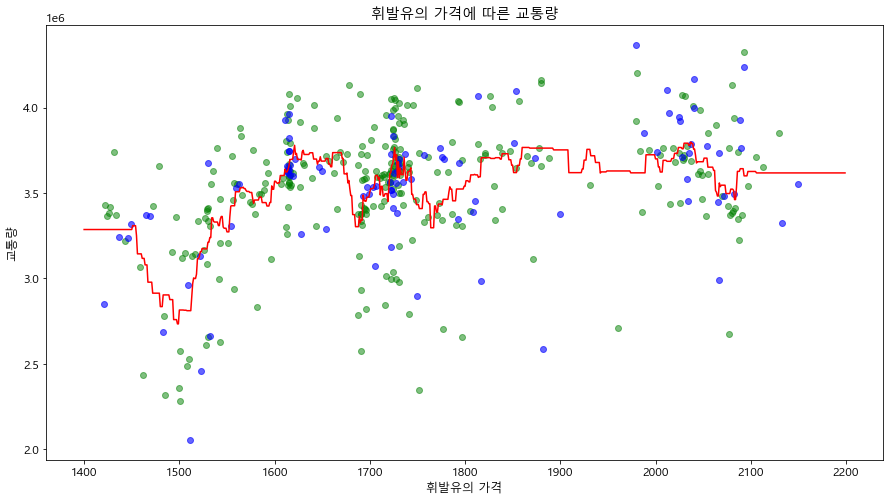

In [354]:
train_g_in, test_g_in, train_g_tg, test_g_tg = train_test_split(gasoline, traffic, random_state = 20)
print(train_g_in.shape, train_g_tg.shape, test_g_in.shape, test_g_tg.shape)

model_g = KNeighborsRegressor()
model_g.n_neighbors = 10
model_g.fit(train_g_in, train_g_tg)

x = np.arange(1400, 2200).reshape(-1, 1)
plt.figure(figsize=(15, 8))
plt.scatter(train_g_in, train_g_tg, alpha=0.5, color='green')
plt.scatter(test_g_in, test_g_tg, alpha=0.6, color='blue')
plt.plot(x, model_g.predict(x), "r")    
plt.rc('font', family = 'Malgun Gothic')

plt.title('휘발유의 가격에 따른 교통량')
plt.xlabel('휘발유의 가격')
plt.ylabel('교통량')
plt.show()

(299, 1) (299, 1) (100, 1) (100, 1)


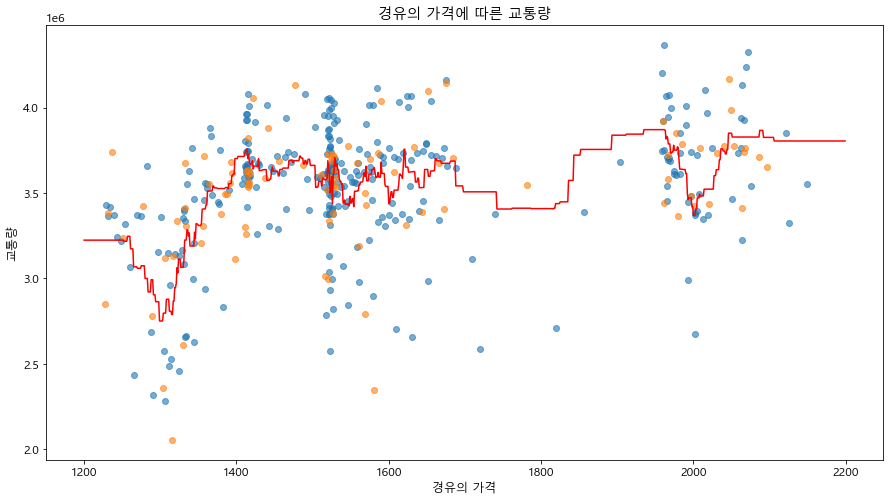

In [355]:
train_d_in, test_d_in, train_d_tg, test_d_tg = train_test_split(diesel, traffic, random_state = 42)
print(train_d_in.shape, train_d_tg.shape, test_d_in.shape, test_d_tg.shape)

model = KNeighborsRegressor()
model.n_neighbors = 10
model.fit(train_d_in, train_d_tg)

x = np.arange(1200, 2200).reshape(-1, 1)
plt.figure(figsize=(15, 8))
plt.scatter(train_d_in, train_d_tg, alpha=0.6)
plt.scatter(test_d_in, test_d_tg, alpha=0.6)
plt.plot(x, model.predict(x), "r")    
plt.rc('font', family = 'Malgun Gothic')

plt.title('경유의 가격에 따른 교통량')
plt.xlabel('경유의 가격')
plt.ylabel('교통량')
plt.show()

# 6. 모델 평가

[ 내용 ]
- 학습이 완료된 모델을 통해 값을 예측해보고, 최종적으로 모델의 성능을 평가
- 반드시 '테스트 데이터'를 이용하여 모델의 학습을 진행해야 함 (# 필수 조건)

[ 모델 평가 ]
- 성능 평가 결과 : 다항 회귀로 작성한 모델의 성능 평가
  - 약 0.2의 성능으로 교통량을 예측하는 것을 알 수 있다.

In [356]:
# 모델 평가

In [357]:
print("휘발유 가격에 따른 교통량 예측 ( 다항회귀 )\n")

score_train_lr_poly = model_lr_g_poly.score(train_poly, target_l_train)
print(f"훈련 데이터로 평가한 성능 : {score_train_lr_poly}")

score_test_lr_poly = model_lr_g_poly.score(test_poly, target_l_test)
print(f"테스트 데이터로 평가한 성능 : {score_test_lr_poly}")

휘발유 가격에 따른 교통량 예측 ( 다항회귀 )

훈련 데이터로 평가한 성능 : 0.16331795644231217
테스트 데이터로 평가한 성능 : 0.19199192520470187


In [358]:
print("경유 가격에 따른 교통량 예측 ( 다항회귀 )\n")

score_train_lr_poly = model_lr_poly.score(train_d_poly, target_ld_train)
print(f"훈련 데이터로 평가한 성능 : {score_train_lr_poly}")

score_test_lr_poly = model_lr_poly.score(test_d_poly, target_ld_test)
print(f"테스트 데이터로 평가한 성능 : {score_test_lr_poly}")

경유 가격에 따른 교통량 예측 ( 다항회귀 )

훈련 데이터로 평가한 성능 : 0.1303998765235217
테스트 데이터로 평가한 성능 : 0.17451721228908124


[ 모델 평가 ]
- 성능 평가 결과 : K-최근접 이웃 회귀로 작성한 모델의 성능 평가
  - 약 0.35정도의 성능으로 예측하는 것을 알 수 있다.

In [359]:
print("휘발유 가격에 따른 교통량 예측 ( K-최근접 이웃 회귀 )\n")

score_train = model_g.score(train_g_in, train_g_tg)
print(f"훈련 데이터로 평가한 성능 : {score_train}") 

score_target = model_g.score(test_g_in, test_g_tg)
print(f"테스트 데이터로 평가한 성능 : {score_target}") 

휘발유 가격에 따른 교통량 예측 ( K-최근접 이웃 회귀 )

훈련 데이터로 평가한 성능 : 0.3297059303551336
테스트 데이터로 평가한 성능 : 0.3540039838484954


In [360]:
print("경유 가격에 따른 교통량 예측 ( K-최근접 이웃 회귀 )\n")

score_train = model.score(train_d_in, train_d_tg)
print(f"훈련 데이터로 평가한 성능 : {score_train}") 

score_target = model.score(test_d_in, test_d_tg)
print(f"테스트 데이터로 평가한 성능 : {score_target}")

경유 가격에 따른 교통량 예측 ( K-최근접 이웃 회귀 )

훈련 데이터로 평가한 성능 : 0.357071822291531
테스트 데이터로 평가한 성능 : 0.3194190148060877


# 프로젝트 마무리

[ 결론 ]
- 진행한 프로젝트 정리

- 요약 (# 필수 조건) : 유가 변동에 따라 어느 정도의 교통량 변화가 있긴 하지만, 여러 상황에 따라 달라지기 때문에 모델이 잘 예측하지는 못하는 것을 알 수 있다. 


- 의의 (# 필수 조건) : 유가 변동에 따른 교통량 변화를 다항 회귀 및 K-최근접 이웃 회귀를 통해 예측할 때 평가한 성능이 0.1~0.3으로 높은 성능에 해당하는 0.5 이상에는 못미치는 것을 알 수 있다. 따라서, '교통량'은 많은 요소들에 의한 작용으로 이루어 지기 때문에 유가변동이라는 한 요소로 예측하는 것이 정확한 예측에 도달하지는 못한다는 것을 알 수 있다.


- 느낀점 (# 필수 조건)
  - 20609 김형진 : 프로젝트를 진행하면서 확인하게된 교통량 변화에 대한 예측의 성능이 상당히 떨어지는 것을 보고 국가교통데이터베이스와 같은 믿을수있는 기관의 방식을 찾아보게 되었다. 국가교통 DB 교통수요예측기법에 의하면 현 주제의 문제상황처럼 급격하고 세부적인 변화에 따른 오차는 발생한다 라는 답을 찾을수있었다. 토한 토지이용, 사회경제 지표, 교통체계 등의 다양한 변수들이 주로 사용되는것을 보고 프로젝트의 성능을 향상시키기 위한 키워드를 알 수 있었다.
  - 20615 장인수 : 국제 정세에 따른 유가 급등으로 인해 사람들이 자가용을 이용하지 않고 대중교통을 이용하는 사람들이 더 늘어날 것으로 생각되어 유가 변동에 따른 교통량을 주제로 프로젝트를 진행해보았으며, 유가 변동과 교통량은 어느정도의 상관관계를 갖고 있었다. 아무래도 교통량은 매일매일 크게 변동하고 여러가지 변수가 많기 때문에 예측에 어려움이 있었다. 유가 뿐만 아닌 공휴일이나 기온, 유류세의 변화 등 더욱 많은 데이터를 고려해 교통량을 예측해 본다면 조금 더 나은 모델이 생성될 것 같다.
  - 20620 최재혁 : 평소에 유가 변동으로 사람들이 교통량이 줄었다는 뉴스 등 여러 가지를 봐왔었는데, 사람이 필수적으로 이용하는 수단인 교통인 만큼 교통량이라는 요소는 유가 변동 말고도 여러 요소가 교통량에 작용함을 알 수 있었다. 또한, 교통량 그래프에서 볼 수 있듯이 굉장히 변동이 큰 데이터에 대해서는 K-최근접 이웃 회귀나 선형 회귀 방법을 이용하여 예측하는 것이 부적절할 수 있다는 사실을 알게 되었다. 추가적으로, 교통량 변화를 다양한 외부요인에 따라 분석을 진행해본다면, 예측하는 모델의 성능이 굉장히 상향될 수 있겠다는 생각을 가지게 되었다.